In [ ]:
# 동물 종류 6가지로 늘려서 분류 모델 만들어보기

In [2]:
import tensorflow_hub as hub

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as pl
import matplotlib.pylab as pt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
md = tf.keras.Sequential([  # 층 추가 후 모델 생성
    
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   input_shape = (224, 224, 3),
                   trainable = False),
                   tf.keras.layers.Dense(6, activation = 'softmax')
])

In [5]:
md.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              58331648  
                                                                 
 dense (Dense)               (None, 6)                 12294     
                                                                 
Total params: 58,343,942
Trainable params: 12,294
Non-trainable params: 58,331,648
_________________________________________________________________


In [13]:
batch = 32
img_h = 224
img_w = 224
train = "drive/MyDrive/animal/train/"
valid = "drive/MyDrive/animal/validation/"

tr = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 10,
                    width_shift_range = 0.1,
                    height_shift_range = 0.1,
                    shear_range = 0.1,
                    zoom_range = 0.1
)

tr_generator = tr.flow_from_directory(
                    train,
                    target_size = (img_h, img_w),
                    color_mode = "rgb",
                    batch_size = batch,
                    seed = 7,
                    shuffle = True,
                    class_mode = "categorical")

vl = ImageDataGenerator( rescale = 1.0/255.0 )

vl_generator = vl.flow_from_directory(
                    valid,
                    target_size = (img_h, img_w),
                    color_mode = "rgb",
                    batch_size = batch,
                    seed = 7,
                    shuffle = True,
                    class_mode = "categorical")

Found 866 images belonging to 6 classes.
Found 247 images belonging to 6 classes.


In [15]:
md.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [16]:
hist = md.fit(tr_generator, epochs = 7, validation_data = vl_generator, verbose = 1)

Epoch 1/7
28/28 [==============================] - 26s 603ms/step - loss: 0.3896 - accuracy: 0.8707 - val_loss: 0.0867 - val_accuracy: 0.9676
Epoch 2/7
28/28 [==============================] - 14s 512ms/step - loss: 0.0453 - accuracy: 0.9827 - val_loss: 0.0623 - val_accuracy: 0.9717
Epoch 3/7
28/28 [==============================] - 14s 512ms/step - loss: 0.0326 - accuracy: 0.9896 - val_loss: 0.0681 - val_accuracy: 0.9636
Epoch 4/7
28/28 [==============================] - 14s 511ms/step - loss: 0.0223 - accuracy: 0.9977 - val_loss: 0.0682 - val_accuracy: 0.9717
Epoch 5/7
28/28 [==============================] - 15s 515ms/step - loss: 0.0162 - accuracy: 0.9977 - val_loss: 0.0659 - val_accuracy: 0.9717
Epoch 6/7
28/28 [==============================] - 14s 512ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0680 - val_accuracy: 0.9757
Epoch 7/7
28/28 [==============================] - 15s 523ms/step - loss: 0.0118 - accuracy: 0.9988 - val_loss: 0.0556 - val_accuracy: 0.9757


Text(0.5, 1.0, 'loss')

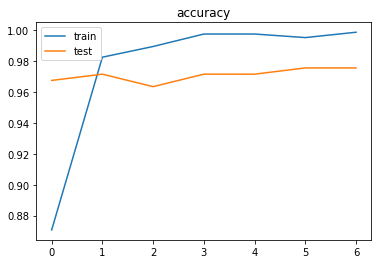

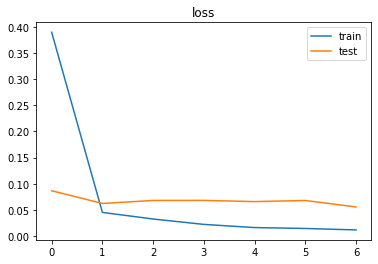

In [17]:
accuracy = hist.history['accuracy']         # 그래프 그리기
val_accuracy = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(accuracy))

pt.plot(epochs, accuracy, label="train")
pt.plot(epochs, val_accuracy, label="test")
pt.legend()
pt.title('accuracy')
pt.figure()

pt.plot(epochs, loss, label="train")
pt.plot(epochs, val_loss, label="test")
pt.legend()
pt.title('loss')

1/1 [==============================] - 1s 1s/step


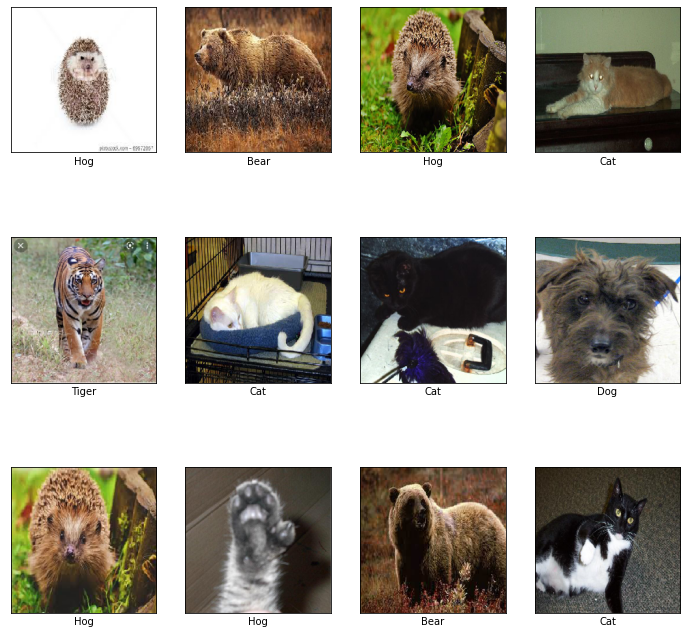

In [18]:
cn = ['Bear', 'Cat', 'Dog', 'Hog', 'Panda', 'Tiger']
valid, lbl_batch = next(iter(vl_generator))
pred = md.predict(valid)
pred = np.argmax(pred, axis = 1)

fig = pt.figure(figsize = (12,12))

for i in range(12):
    
    pt.subplot(3, 4, i+1)
    pt.imshow(valid[i])
    pt.xticks(ticks = [])
    pt.yticks(ticks = [])
    
    pt.xlabel(cn[pred[i]])